In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
f_name=font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)
from plotnine import *
import seaborn as sns

In [3]:
%pwd

'C:\\Users\\lg_gram\\Intel\\bigcontest'

# 데이터 불러오기

In [4]:
pop=pd.read_csv("eco jeju/03_거주인구_RESIDENT_POP.csv",encoding="CP949")
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   base_year      3612 non-null   int64 
 1   base_month     3612 non-null   int64 
 2   city           3612 non-null   object
 3   emd_cd         3612 non-null   int64 
 4   emd_nm         3612 non-null   object
 5   sex            3612 non-null   object
 6   resid_reg_pop  3612 non-null   int64 
 7   foreign_pop    3612 non-null   int64 
 8   total_pop      3612 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 254.1+ KB


In [5]:
waste=pd.read_csv("eco jeju/01_음식물쓰레기_FOOD_WASTE_210811_update.csv",encoding="CP949",low_memory=False)
waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


# 데이터 전처리

In [6]:
pop.rename(columns={'base_year':'year','base_month':'month'},inplace=True)

In [7]:
pop.emd_nm.unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [8]:
waste.emd_nm.unique()

array(['외도동', '아라동', '노형동', '도두동', '오라동', '삼양동', '이도2동', '일도2동', '건입동',
       '화북동', '봉개동', '삼도1동', '이도1동', '용담2동', '연동', '이호동', '애월읍', '동홍동',
       '대정읍', '영천동', '서홍동', '효돈동', '중문동', '대륜동', '남원읍', '대천동', '안덕면',
       '천지동', '예래동', '표선면', '알수없음', '성산읍', '정방동', '송산동', '중앙동', '삼도2동',
       '일도1동', '용담1동', '조천읍', '구좌읍', '한림읍', '한경면'], dtype=object)

In [9]:
waste['year']=waste.base_date.apply(lambda x: x.split("-")[0]).astype(int)
waste['month']=waste.base_date.apply(lambda x: x.split("-")[1]).astype(int)
waste.head()
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211445 entries, 0 to 2211444
Data columns (total 10 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   base_date   object
 1   city        object
 2   emd_cd      object
 3   emd_nm      object
 4   em_area_cd  object
 5   em_cnt      int64 
 6   em_g        int64 
 7   pay_amt     int64 
 8   year        int32 
 9   month       int32 
dtypes: int32(2), int64(3), object(5)
memory usage: 151.8+ MB


# 연도별 읍면동별 인구와 연도별 읍면동별 쓰레기 배출량

In [10]:
#인구는 연도별로 평균내기
pop_year=pd.pivot_table(pop,index=['year','emd_nm'],columns=['sex'],values=['total_pop'])
pop_year

total_pop              
sex                    남성            여성
year emd_nm                            
2018 건입동      5193.333333   4799.833333
     구좌읍      8416.583333   7816.750000
     남원읍     10287.000000   9550.583333
     노형동     27409.083333  28137.250000
     대륜동      7051.416667   6913.250000
...                   ...           ...
2021 표선면      6539.333333   6147.833333
     한경면      4835.000000   4627.500000
     한림읍     13022.500000  11488.333333
     화북동     12293.166667  12430.166667
     효돈동      2704.000000   2626.333333

[172 rows x 2 columns]

In [11]:
pop_year[('total_pop','total')]=pop_year[('total_pop','남성')]+pop_year[('total_pop','여성')]
pop_year

total_pop                            
sex                    남성            여성         total
year emd_nm                                          
2018 건입동      5193.333333   4799.833333   9993.166667
     구좌읍      8416.583333   7816.750000  16233.333333
     남원읍     10287.000000   9550.583333  19837.583333
     노형동     27409.083333  28137.250000  55546.333333
     대륜동      7051.416667   6913.250000  13964.666667
...                   ...           ...           ...
2021 표선면      6539.333333   6147.833333  12687.166667
     한경면      4835.000000   4627.500000   9462.500000
     한림읍     13022.500000  11488.333333  24510.833333
     화북동     12293.166667  12430.166667  24723.333333
     효돈동      2704.000000   2626.333333   5330.333333

[172 rows x 3 columns]

In [12]:
waste_year=waste[['year','emd_nm','em_g']].groupby(['year','emd_nm']).sum()
waste_year


em_g
year emd_nm            
2018 건입동      566486550
     남원읍      533275500
     노형동     3214560665
     대륜동      656449500
     대정읍      553164700
...                 ...
2021 표선면      207188200
     한경면      132947250
     한림읍      425945474
     화북동      606630650
     효돈동      153522900

[164 rows x 1 columns]

In [13]:
for y in pop.year.unique():
    print(len(pop_year.loc[y].index))

43
43
43
43


In [14]:
for m in waste.year.unique():
    print(len(waste_year.loc[m].index))

38
42
42
42


- 읍면동의 갯수가 다르다

In [15]:
year_merge=pd.merge(waste_year,pop_year,left_index=True,right_index=True,how='outer')
year_merge.rename(columns={('total_pop', '남성'):'male_pop',('total_pop', '여성'):'female_pop',
                          ('total_pop', 'total'):'total_pop'},inplace=True)

C:\Users\lg_gram\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)


In [16]:
year_merge

em_g      male_pop    female_pop     total_pop
year emd_nm                                                        
2018 건입동     5.664866e+08   5193.333333   4799.833333   9993.166667
     구좌읍              NaN   8416.583333   7816.750000  16233.333333
     남원읍     5.332755e+08  10287.000000   9550.583333  19837.583333
     노형동     3.214561e+09  27409.083333  28137.250000  55546.333333
     대륜동     6.564495e+08   7051.416667   6913.250000  13964.666667
...                   ...           ...           ...           ...
2021 표선면     2.071882e+08   6539.333333   6147.833333  12687.166667
     한경면     1.329472e+08   4835.000000   4627.500000   9462.500000
     한림읍     4.259455e+08  13022.500000  11488.333333  24510.833333
     화북동     6.066306e+08  12293.166667  12430.166667  24723.333333
     효돈동     1.535229e+08   2704.000000   2626.333333   5330.333333

[176 rows x 4 columns]

In [17]:
#인구당 배출량
year_merge['g_per_pop']=year_merge.em_g/year_merge.total_pop
year_merge=year_merge.fillna(0)

In [18]:
#em_g이 0인 읍면동별
year_merge.loc[year_merge['em_g']==0]

em_g      male_pop    female_pop     total_pop  g_per_pop
year emd_nm                                                           
2018 구좌읍      0.0   8416.583333   7816.750000  16233.333333        0.0
     우도면      0.0   1013.833333    892.500000   1906.333333        0.0
     조천읍      0.0  12584.500000  11796.750000  24381.250000        0.0
     추자면      0.0   1329.666667    849.000000   2178.666667        0.0
     한경면      0.0   4792.083333   4592.500000   9384.583333        0.0
     한림읍      0.0  13191.250000  11556.500000  24747.750000        0.0
2019 우도면      0.0   1002.166667    902.166667   1904.333333        0.0
     추자면      0.0   1267.666667    809.500000   2077.166667        0.0
2020 우도면      0.0    948.000000    865.500000   1813.500000        0.0
     추자면      0.0   1188.500000    793.916667   1982.416667        0.0
2021 우도면      0.0    916.000000    841.666667   1757.666667        0.0
     추자면      0.0   1130.333333    770.666667   1901.000000        0.0

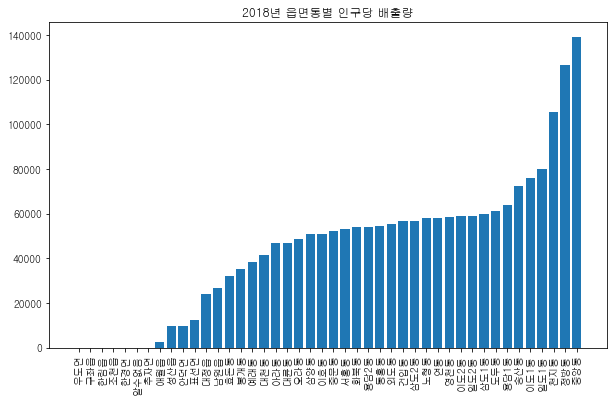

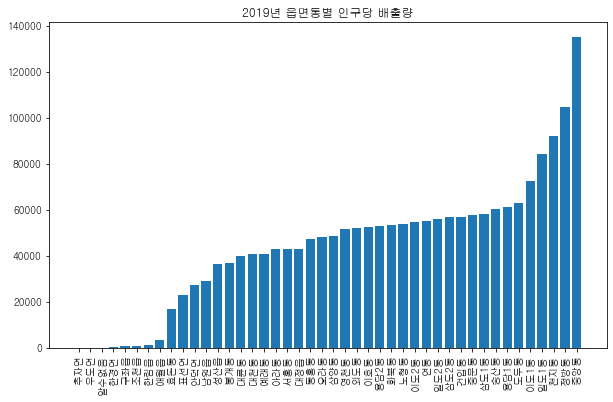

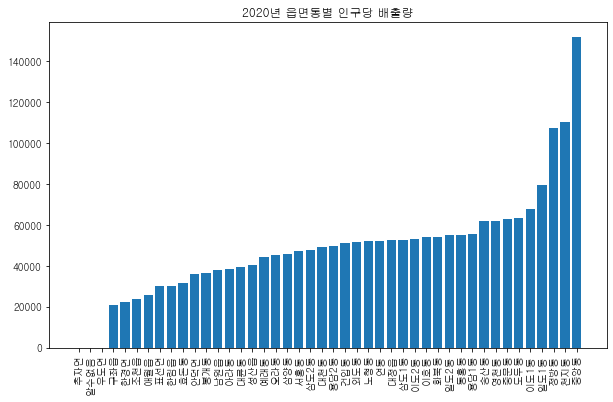

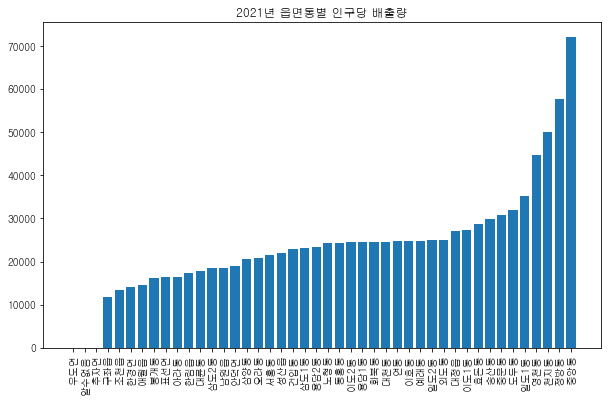

In [19]:
#알수없음은 인구파트에는 없기 때문에 g_per_pop이 inf가 될꺼니까 우선 0 하기
for y in waste.year.unique():
    plt.figure(figsize=(10,6))
    year_merge.loc[(y,'알수없음'),'g_per_pop']=0
    per_pop=year_merge.xs(y,level='year')['g_per_pop'].reset_index().sort_values(by=['g_per_pop'])
    plt.bar(per_pop['emd_nm'],per_pop['g_per_pop'])
    plt.xticks(rotation=90)
    plt.title("{}년 읍면동별 인구당 배출량".format(y))

- 중앙동, 정방동, 천지동은 배출 거점 갯수가 적은 지역이다.+효돈동도(하지만 효돈동인 인구당 배출량이 작다)
- 중앙동은 배출건수당 배출량도 많은 동
- 중앙동, 정방동, 천지동, 일도1동 이도1동은 모두 단기 체류 외국인 유동인구에서 아침 저녁 시간대에 높은 수치를 보인다 -> 즉, 숙박하는 장소
- 정방동, 중앙동, 영천동, 천지동은 모두 마트 슈퍼마켓의 비율이 압도적으로 높다 (하지만, 동홍동, 서홍동, 송산동도 매우 높은데..)

In [20]:
#상관관계
year_merge=year_merge.reset_index()
year_merge.head()

,year,emd_nm,em_g,male_pop,female_pop,total_pop,g_per_pop
0,2018,건입동,5.664866e+08,5193.333333,4799.833333,9993.166667,56687.391384
1,2018,구좌읍,0.000000e+00,8416.583333,7816.750000,16233.333333,0.000000
2,2018,남원읍,5.332755e+08,10287.000000,9550.583333,19837.583333,26882.079890
3,2018,노형동,3.214561e+09,27409.083333,28137.250000,55546.333333,57871.698672
4,2018,대륜동,6.564495e+08,7051.416667,6913.250000,13964.666667,47007.888958


In [21]:
#인구와 배출량 상관관계
year_merge_corr=year_merge.corr().style.background_gradient(cmap='summer_r')
year_merge_corr

,year,em_g,male_pop,female_pop,total_pop,g_per_pop
year,1.000000,-0.148903,0.004498,0.007383,0.005961,-0.238424
em_g,-0.148903,1.000000,0.795984,0.820919,0.809114,0.289143
male_pop,0.004498,0.795984,1.000000,0.997471,0.999352,-0.116896
female_pop,0.007383,0.820919,0.997471,1.000000,0.999383,-0.089705
total_pop,0.005961,0.809114,0.999352,0.999383,1.000000,-0.103202
g_per_pop,-0.238424,0.289143,-0.116896,-0.089705,-0.103202,1.000000


- 인구와 배출량의 상관관계는 0.8로 매우 높다
- 여성인구가 남성인구보다 상관관계가 조금 더 높다
- 연도와 배출량의 음의 상관관계를 가진다(2021년은 6월까지 밖에 없다)

## 월별 읍면동 별 평균 인구 + 총 배출량
 

In [22]:
pop_month=pd.pivot_table(pop,index=['month','emd_nm'],columns=['sex'],values=['total_pop'])
pop_month[('total_pop','total')]=pop_month[('total_pop','남성')]+pop_month[('total_pop','여성')]
pop_month

total_pop                            
sex                     남성            여성         total
month emd_nm                                          
1     건입동      4981.250000   4659.500000   9640.750000
      구좌읍      8393.500000   7759.500000  16153.000000
      남원읍     10226.750000   9435.000000  19661.750000
      노형동     27717.000000  28508.500000  56225.500000
      대륜동      7291.250000   7138.250000  14429.500000
...                    ...           ...           ...
12    표선면      6603.333333   6142.333333  12745.666667
      한경면      4822.000000   4602.666667   9424.666667
      한림읍     13267.000000  11630.333333  24897.333333
      화북동     12555.333333  12605.000000  25160.333333
      효돈동      2722.000000   2629.666667   5351.666667

[516 rows x 3 columns]

In [23]:
waste_month=waste[['month','emd_nm','em_g']].groupby(['month','emd_nm']).sum()
waste_month

em_g
month emd_nm            
1     건입동      174311650
      구좌읍       46203450
      남원읍      213071800
      노형동     1007338200
      대륜동      211572049
...                  ...
12    표선면       69900650
      한경면       22694350
      한림읍       97492450
      화북동      339425650
      효돈동       45744250

[504 rows x 1 columns]

In [24]:
month_merge=pd.merge(waste_month,pop_month,left_index=True,right_index=True,how='outer')
month_merge.rename(columns={('total_pop', '남성'):'male_pop',('total_pop', '여성'):'female_pop',
                          ('total_pop', 'total'):'total_pop'},inplace=True)


C:\Users\lg_gram\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)


In [25]:
#인구당 배출량
month_merge['g_per_pop']=month_merge.em_g/month_merge.total_pop
month_merge=month_merge.fillna(0)
month_merge

em_g      male_pop    female_pop     total_pop  \
month emd_nm                                                           
1     건입동     1.743116e+08   4981.250000   4659.500000   9640.750000   
      구좌읍     4.620345e+07   8393.500000   7759.500000  16153.000000   
      남원읍     2.130718e+08  10226.750000   9435.000000  19661.750000   
      노형동     1.007338e+09  27717.000000  28508.500000  56225.500000   
      대륜동     2.115720e+08   7291.250000   7138.250000  14429.500000   
...                    ...           ...           ...           ...   
12    표선면     6.990065e+07   6603.333333   6142.333333  12745.666667   
      한경면     2.269435e+07   4822.000000   4602.666667   9424.666667   
      한림읍     9.749245e+07  13267.000000  11630.333333  24897.333333   
      화북동     3.394256e+08  12555.333333  12605.000000  25160.333333   
      효돈동     4.574425e+07   2722.000000   2629.666667   5351.666667   

                 g_per_pop  
month emd_nm                
1     건입동     18080.714675  
      구좌읍      2860.363400  
      남원읍     10836.868539  
      노형동     17916.038097  
      대륜동     14662.465713  
...                    ...  
12    표선면      5484.267856  
      한경면      2407.973757  
      한림읍      3915.778798  
      화북동     13490.506883  
      효돈동      8547.664279  

[528 rows x 5 columns]

In [26]:
#em_g이 0인 읍면동별
#우도면 추자면은 아예 데이터가 없음
month_merge.loc[month_merge['em_g']==0]

em_g     male_pop  female_pop    total_pop  g_per_pop
month emd_nm                                                       
1     우도면      0.0   977.500000  882.250000  1859.750000        0.0
      추자면      0.0  1265.250000  817.000000  2082.250000        0.0
2     우도면      0.0   977.000000  880.750000  1857.750000        0.0
      추자면      0.0  1260.500000  816.000000  2076.500000        0.0
3     우도면      0.0   975.250000  875.750000  1851.000000        0.0
      추자면      0.0  1240.750000  808.750000  2049.500000        0.0
4     우도면      0.0   973.750000  876.000000  1849.750000        0.0
      추자면      0.0  1230.500000  807.750000  2038.250000        0.0
5     우도면      0.0   971.250000  875.500000  1846.750000        0.0
      추자면      0.0  1220.250000  803.250000  2023.500000        0.0
6     우도면      0.0   973.000000  872.250000  1845.250000        0.0
      추자면      0.0  1221.750000  803.500000  2025.250000        0.0
7     우도면      0.0   990.000000  886.666667  1876.666667        0.0
      추자면      0.0  1248.333333  815.666667  2064.000000        0.0
8     우도면      0.0   989.000000  888.000000  1877.000000        0.0
      추자면      0.0  1247.666667  815.666667  2063.333333        0.0
9     우도면      0.0   982.333333  887.333333  1869.666667        0.0
      추자면      0.0  1252.333333  813.000000  2065.333333        0.0
10    우도면      0.0   979.666667  886.333333  1866.000000        0.0
      추자면      0.0  1244.333333  811.000000  2055.333333        0.0
11    우도면      0.0   977.666667  881.333333  1859.000000        0.0
      추자면      0.0  1247.000000  810.000000  2057.000000        0.0
12    우도면      0.0   972.333333  877.666667  1850.000000        0.0
      추자면      0.0  1245.666667  810.666667  2056.333333        0.0

In [27]:
month_merge=month_merge.reset_index()

In [28]:
month_merge=pd.get_dummies(month_merge,columns=['month'])

In [29]:
month_merge_corr=month_merge.corr().style.background_gradient(cmap='summer_r')
month_merge_corr

,em_g,male_pop,female_pop,total_pop,g_per_pop,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
em_g,1.000000,0.851584,0.879416,0.866211,0.212244,0.042000,0.017064,0.033241,0.012377,0.042142,0.049900,0.000434,-0.000946,-0.045765,-0.058125,-0.056308,-0.036013
male_pop,0.851584,1.000000,0.997469,0.999352,-0.130150,-0.001038,-0.000905,-0.000918,-0.000653,-0.000298,-0.000013,0.000069,0.000434,0.000678,0.000823,0.000891,0.000932
female_pop,0.879416,0.997469,1.000000,0.999382,-0.099048,-0.000985,-0.000709,-0.000720,-0.000443,-0.000098,0.000134,-0.000315,0.000096,0.000417,0.000703,0.000905,0.001013
total_pop,0.866211,0.999352,0.999382,1.000000,-0.114490,-0.001012,-0.000806,-0.000818,-0.000547,-0.000197,0.000061,-0.000125,0.000263,0.000546,0.000763,0.000899,0.000973
g_per_pop,0.212244,-0.130150,-0.099048,-0.114490,1.000000,0.071152,0.020197,0.047625,0.016801,0.069308,0.080562,-0.010970,-0.001478,-0.068166,-0.085574,-0.082825,-0.056632
month_1,0.042000,-0.001038,-0.000985,-0.001012,0.071152,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
month_2,0.017064,-0.000905,-0.000709,-0.000806,0.020197,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
month_3,0.033241,-0.000918,-0.000720,-0.000818,0.047625,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
month_4,0.012377,-0.000653,-0.000443,-0.000547,0.016801,-0.090909,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
month_5,0.042142,-0.000298,-0.000098,-0.000197,0.069308,-0.090909,-0.090909,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909


- 연도별과 큰 결과 차이 없다
- 월과 배출량의 관계는 2021년이 6월까지밖에 없어 비교할 수 없다

# 읍면동별 평균인구 + 총 배출량

In [30]:
pop_total=pd.pivot_table(pop,index=['emd_nm'],columns=['sex'],values=['total_pop'])
pop_total[('total_pop','total')]=pop_total[('total_pop','남성')]+pop_total[('total_pop','여성')]
pop_total


total_pop                            
sex               남성            여성         total
emd_nm                                          
건입동      4957.476190   4653.833333   9611.309524
구좌읍      8413.309524   7768.904762  16182.214286
남원읍     10239.500000   9445.714286  19685.214286
노형동     27798.595238  28563.095238  56361.690476
대륜동      7336.761905   7194.452381  14531.214286
대정읍     11407.666667  11720.547619  23128.214286
대천동      7065.642857   6854.357143  13920.000000
도두동      1733.642857   1554.119048   3287.761905
동홍동     11859.333333  12336.928571  24196.261905
봉개동      2604.928571   2390.166667   4995.095238
삼도1동     6902.714286   7177.642857  14080.357143
삼도2동     4433.380952   4073.119048   8506.500000
삼양동     12787.928571  12717.833333  25505.761905
서홍동      5308.785714   5381.761905  10690.547619
성산읍      9190.357143   7943.619048  17133.976190
송산동      2661.952381   2172.809524   4834.761905
아라동     17775.785714  17943.976190  35719.761905
안덕면      6455.666667   6081.690476  12537.357143
애월읍     19128.547619  17915.142857  37043.690476
연동      21351.619048  22198.238095  43549.857143
영천동      2800.952381   2630.714286   5431.666667
예래동      2173.523810   2081.952381   4255.476190
오라동      7741.809524   7589.452381  15331.261905
외도동     11013.571429  10905.904762  21919.476190
용담1동     3805.333333   3608.666667   7414.000000
용담2동     7736.976190   7657.880952  15394.857143
우도면       977.714286    880.285714   1858.000000
이도1동     3885.404762   3976.952381   7862.357143
이도2동    24755.095238  25761.285714  50516.380952
이호동      2414.238095   2258.595238   4672.833333
일도1동     1502.047619   1348.476190   2850.523810
일도2동    16742.380952  17390.357143  34132.738095
정방동      1220.738095   1182.785714   2403.523810
조천읍     12950.214286  12215.547619  25165.761905
중문동      5967.190476   5620.285714  11587.476190
중앙동      1818.357143   2000.952381   3819.309524
천지동      1858.619048   1800.047619   3658.666667
추자면      1243.142857    810.785714   2053.928571
표선면      6592.261905   6142.571429  12734.833333
한경면      4819.333333   4610.261905   9429.595238
한림읍     13221.619048  11604.857143  24826.476190
화북동     12580.095238  12611.571429  25191.666667
효돈동      2724.904762   2638.738095   5363.642857

In [31]:
waste_total=waste[['emd_nm','em_g']].groupby(['emd_nm']).sum()
waste_total.head()

,em_g
emd_nm,
건입동,1806250850
구좌읍,538528350
남원읍,2212342000
노형동,10598196902
대륜동,2088993653


In [32]:
total_merge=pd.merge(waste_total,pop_total,left_index=True,right_index=True,how='outer')
total_merge.rename(columns={('total_pop', '남성'):'male_pop',('total_pop', '여성'):'female_pop',
                          ('total_pop', 'total'):'total_pop'},inplace=True)


C:\Users\lg_gram\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)


In [33]:
#읍면동별 인구1명당 2021년까지 평균 배출량
total_merge['g_per_pop']=total_merge.em_g/total_merge.total_pop
total_merge=total_merge.fillna(0)
total_merge.sort_values(by='g_per_pop',inplace=True)

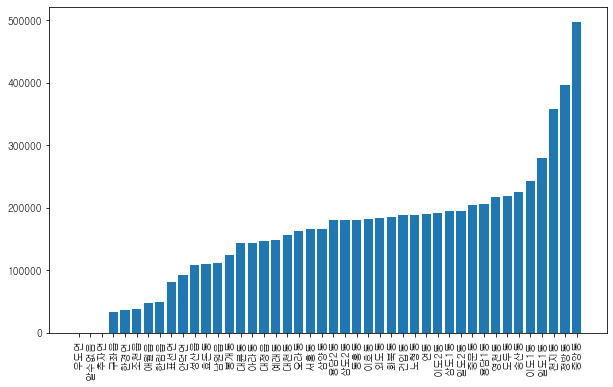

In [34]:

    plt.figure(figsize=(10,6))
    plt.bar(total_merge.index,total_merge['g_per_pop'])
    plt.xticks(rotation=90)
    plt.show()

In [35]:
total_merge=total_merge.reset_index()
total_merge_corr=total_merge.corr().style.background_gradient(cmap='summer_r')
total_merge_corr

,em_g,male_pop,female_pop,total_pop,g_per_pop
em_g,1.000000,0.866878,0.895082,0.881702,0.189890
male_pop,0.866878,1.000000,0.997474,0.999353,-0.133630
female_pop,0.895082,0.997474,1.000000,0.999383,-0.101688
total_pop,0.881702,0.999353,0.999383,1.000000,-0.117546
g_per_pop,0.189890,-0.133630,-0.101688,-0.117546,1.000000
